   Unnamed: 0  substanceid  molecularweight  \
0       25256     37400562          61.0605   
1    20811690     37756469          63.0788   
2    22092063     39041956          74.1154   
3    20971154     37915921          64.0526   
4    20971103     37915867          64.0868   

                                       inchi  pa  
0         InChI=1S/C2H5O2/c1-2-4-3/h2-3H,1H3   3  
1           InChI=1S/C5H3/c1-3-5-4-2/h1H,2H2   3  
2        InChI=1S/CH3NOSi/c3-1-2-4/h4H3/i1+1   3  
3  InChI=1S/C2H6O2/c1-2(3)4/h2-4H,1H3/i3D,4D   3  
4            InChI=1S/C5H4/c1-3-5-4-2/h1-2H2   3  


RDKit ERROR: [16:05:38] ERROR: Explicit valence for atom # 25 Ga, 4, is greater than permitted
[16:05:38] ERROR: Explicit valence for atom # 25 Ga, 4, is greater than permitted
[16:06:21] Explicit valence for atom # 4 B, 4, is greater than permitted
RDKit ERROR: [16:06:21] Explicit valence for atom # 4 B, 4, is greater than permitted
RDKit ERROR: [16:06:21] ERROR: Explicit valence for atom # 4 B, 4, is greater than permitted
RDKit ERROR: [16:06:21] Explicit valence for atom # 4 B, 4, is greater than permitted
[16:06:21] ERROR: Explicit valence for atom # 4 B, 4, is greater than permitted
[16:06:21] Explicit valence for atom # 4 B, 4, is greater than permitted
RDKit ERROR: [16:06:21] ERROR: Explicit valence for atom # 4 B, 4, is greater than permitted
[16:06:21] ERROR: Explicit valence for atom # 4 B, 4, is greater than permitted
[16:06:21] Explicit valence for atom # 25 Ga, 4, is greater than permitted
RDKit ERROR: [16:06:21] Explicit valence for atom # 25 Ga, 4, is greater than permit

[[1.         0.80298684]
 [0.80298684 1.        ]]


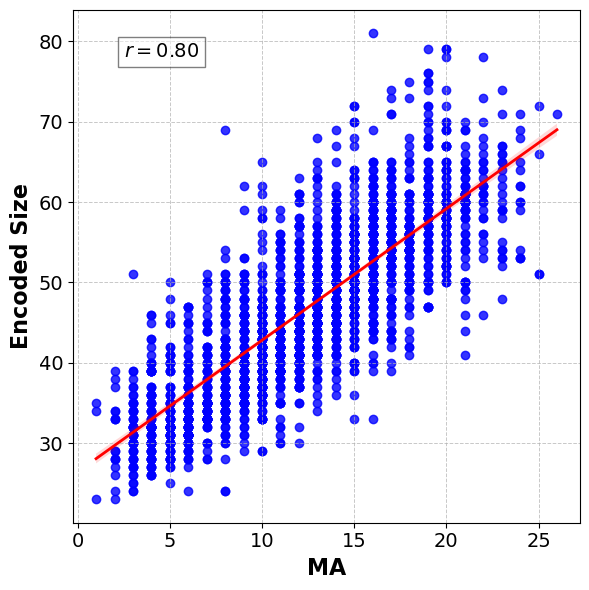

In [26]:
#read csv file
import gzip
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import rdkit
import warnings
from rdkit import Chem
warnings.filterwarnings("ignore")




# Example InChI string
inchi_str = "InChI=1S/C6H6/c1-2-4-6-5-3-1/h1-6H"

def inchi2smiles(inchi_str):
    # Create an RDKit molecule object from the InChI string
    mol = Chem.MolFromInchi(inchi_str)

    # Check if the molecule was successfully created
    if mol is not None:
        # Convert the molecule object to a SMILES string
        smiles_str = Chem.MolToSmiles(mol)
        return smiles_str
        print(f"The SMILES representation is: {smiles_str}")
    else:
        return None

from scipy.stats import linregress


ma_data =pd.read_csv("ma_mw_subsampled_by_mw.csv")
print(ma_data.head())
#load molecular weight, Inchi, and pa values
_, inchi, pa = ma_data['molecularweight'], ma_data['inchi'], ma_data['pa']
#using rkdi
#make scatter plot of molecular weight vs pa


ALL_SMILES, MA, ENCODESIZE = [], [], []

for inch_str, ma  in zip(inchi, pa):
    smiles = inchi2smiles(inch_str)
    if smiles is not None:
        ALL_SMILES.append(smiles)
        MA.append(ma)
        #ENCODESIZE.append(len(gzip.compress(smiles.encode())))
        ENCODESIZE.append(len(gzip.compress(smiles.encode())))
    else:
        pass
#compute linear correlation coefficient between molecular weight and pa
print(np.corrcoef(MA, ENCODESIZE))
# Create a figure and axis object
fig, ax = plt.subplots(figsize=(6, 6))

# Create the scatter plot with a linear fit
sns.regplot(x=MA, y=ENCODESIZE, ax=ax, color='blue', line_kws={"color": "red", "lw": 2})

# Set axis labels
ax.set_xlabel('MA', fontsize=16, fontweight='bold')
ax.set_ylabel('Encoded Size', fontsize=16, fontweight='bold')

# Set axis tick labels size
ax.tick_params(axis='both', which='major', labelsize=14)

# Add a grid
ax.grid(True, linestyle='--', linewidth=0.7, alpha=0.7)

# Calculate the linear correlation coefficient
correlation_matrix = np.corrcoef(MA, ENCODESIZE)
correlation_coefficient = correlation_matrix[0, 1]

# Add the linear correlation coefficient as an inset
ax.text(0.1, 0.9, f'$r = {correlation_coefficient:.2f}$', horizontalalignment='left', verticalalignment='bottom', transform=ax.transAxes, fontsize=14, bbox=dict(facecolor='white', alpha=0.5))

# Show the plot without extra white space
plt.tight_layout()
plt.savefig('ma_vs_encoded_size.png', dpi=300)
plt.show()

In [8]:
smiles_str

'c1ccccc1'